<a href="https://colab.research.google.com/github/sudhirtakke/RNN-vs-LSTM-vs-GRU/blob/main/%20SimpleRNN_vs_LSTM_vs_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SimpleRNN vs LSTM vs GRU

**Problem Description** <br/>
 - Classifying movie reviews: a binary classification example.
Two-class classification, or binary classification, may be the most widely applied kind
of machine-learning problem.
 - Here, we will see **how** **SimpleRNN, LSTM** and **GRU perform** at classifying movie reviews as
**positive or negative**, based on the text content of the reviews.

## Table of Contents

1.	[Dataset Description](#section1)<br/>
2.	[Examining the Data](#section2)
3.	[Preprocessing](#section3)
4.	[SimpleRNN Model](#section4)
5.	[SimpleRNN Model Evaluation](#section5)
6.	[LSTM Model](#section6)
7.	[LSTM Model Evaluaton](#section7)
8.  [GRU Model](#section8)
9.  [GRU Model Evaluation](#section9)


<a id=section1></a>

### 1. Dataset Description

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/dataset-original.jpg" width="800" height="400" /></center>

**The IMDB dataset**
 - We’ll work with the IMDB dataset: a set of **50,000** highly polarized reviews from the Internet Movie Database.  
 - They’re split into **25,000 reviews for training** and **25,000 reviews for testing**, each set consisting of **50% negative** and **50% positive reviews**.
 - The IMDB dataset **comes packaged with Keras**. It has
**already been preprocessed**: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.

We will consider **only top 10,000 most frequently occuring words.**

 **Note:**
 - We are encountering an error while loading dataset from keras library with numpy 1.16
 - So install numpy 1.14 using below cell and restart the session. <br/>
 - We don't have to re-run the below cell once   we have restarted the session after installing numpy 1.14

In [ ]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [ ]:
# If current version of numpy gives an error while running the dataset below, then run this cell.
# Otherwise skip this cell.

!pip install numpy==1.14.2

# Restart the session after installing and don't run this cell again after restarting the session

     |████████████████████████████████| 12.2MB 9.8MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.2 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.2 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.14.2 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.2 which is incompatible.
ERROR: seaborn 0.11.0 has requirement numpy>=1.15, but you'll have numpy 1.14.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.14.2 which is incompatible.
ERROR: pandas 1.1.2 has requirement numpy>=1.15.4, but you'll have numpy 1.14.2 which is incompatible.
ERROR: numba 0.48.0 has requirement numpy>=1.15, but you'll have numpy 1.14.2 which is incompatible.


In [ ]:
from tensorflow.keras.datasets import imdb
max_features = 10000
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


 - The argument **num_words=10000** means we’ll only keep the top **10,000 most frequently**
**occurring words in the training data**. Rare words will be discarded. This allows
we to work with vector data of manageable size.
 - The variables **train_data** and **test_data** are **lists of reviews**; each review is a list of
word indices (encoding a sequence of words). **train_labels** and **test_labels** are
**lists of 0s and 1s, where 0 stands for negative and 1 stands for positive**.

<a id=section2></a>

### 2. Examining the Data

In [ ]:
print('1st review in training data:\n')
print(input_train[0])

1st review in training data:

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
print('Sentiment of 1st review in training data:\n')
print(y_train[0])

Sentiment of 1st review in training data:

1


 - For kicks, here’s how we can quickly decode one of these reviews back to English
words:

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in input_train[0]])
print('1st review in training data actually looks like:\n')
print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step
1st review in training data actually looks like:

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big prof

 - Let’s build a **SimpleRNN** model on the **IMDB movie-review-classification problem**. 
 - First, **preprocess the data.**

<a id=section3></a>

### 3. Preprocessing

 -  We will **truncate** the **each review** to a length of **500 words**.
 - **Reviews less than 500 words will be padded with zeros** upto a total review length of 500 words.

In [ ]:
from tensorflow.keras.preprocessing import sequence
maxlen = 500
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


<a id=section4></a>

### 4. SimpleRNN Model

 - Let’s train a simple recurrent network using an **Embedding layer** and a **SimpleRNN**
**layer**.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dense, SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
%%time
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 52s 328ms/step - loss: 0.5527 - acc: 0.7110 - val_loss: 0.3865 - val_acc: 0.8346
Epoch 2/10
157/157 [==============================] - 51s 326ms/step - loss: 0.3582 - acc: 0.8548 - val_loss: 0.3941 - val_acc: 0.8334
Epoch 3/10
157/157 [==============================] - 53s 335ms/step - loss: 0.2685 - acc: 0.8951 - val_loss: 0.4096 - val_acc: 0.8198
Epoch 4/10
157/157 [==============================] - 52s 330ms/step - loss: 0.2317 - acc: 0.9119 - val_loss: 0.4339 - val_acc: 0.8078
Epoch 5/10
157/157 [==============================] - 51s 324ms/step - loss: 0.1976 - acc: 0.9255 - val_loss: 0.4061 - val_acc: 0.8254
Epoch 6/10
157/157 [==============================] - 52s 331ms/step - loss: 0.1651 - acc: 0.9391 - val_loss: 0.3842 - val_acc: 0.8476
Epoch 7/10
157/157 [==============================] - 52s 332ms/step - loss: 0.1304 - acc: 0.9524 - val_loss: 0.4286 - val_acc: 0.8610
Epoch 8/10
157/157 [==============================] - 5

 - Now, let’s display the training and validation loss and accuracy

<a id=section5></a>

### 5.	SimpleRNN Model Evaluation

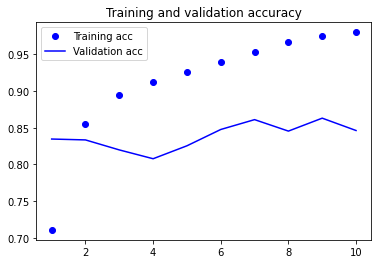

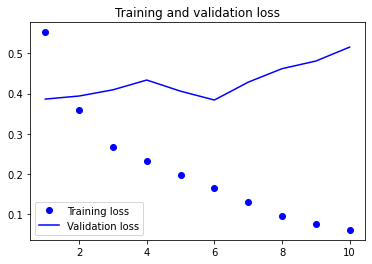

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### - The highest accuracy on validation dataset is 85%

<a id=section6></a>

### 6. LSTM Model

### Let's see how LSTM performs.

In [ ]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [ ]:
%%time
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 29ms/step - loss: 0.5485 - acc: 0.7401 - val_loss: 0.4186 - val_acc: 0.8170
Epoch 2/10
157/157 [==============================] - 4s 28ms/step - loss: 0.3051 - acc: 0.8787 - val_loss: 0.2817 - val_acc: 0.8888
Epoch 3/10
157/157 [==============================] - 4s 27ms/step - loss: 0.2379 - acc: 0.9082 - val_loss: 0.2760 - val_acc: 0.8946
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 0.2036 - acc: 0.9230 - val_loss: 0.3472 - val_acc: 0.8842
Epoch 5/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1750 - acc: 0.9361 - val_loss: 0.2854 - val_acc: 0.8886
Epoch 6/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1592 - acc: 0.9433 - val_loss: 0.5458 - val_acc: 0.8492
Epoch 7/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1450 - acc: 0.9485 - val_loss: 0.4141 - val_acc: 0.8684
Epoch 8/10
157/157 [==============================] - 4s 26ms/step - 

<a id=section7></a>

### 7.	LSTM Model Evaluaton

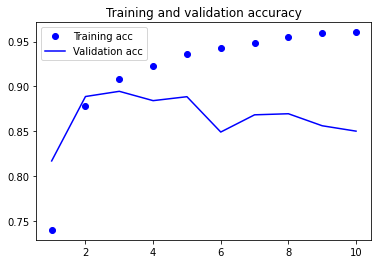

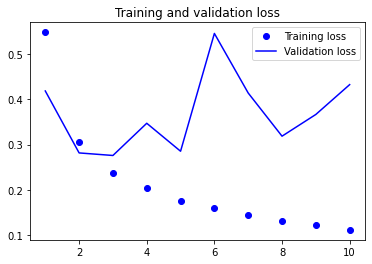

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### - The highest accuracy on validation dataset is 89%

 - We can clearly see **LSTM out performs SimpleRNN**.

### 8. GRU Model

### Let's see how GRU performs.

In [ ]:
from tensorflow.keras.layers import GRU
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [ ]:
%%time
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 29ms/step - loss: 0.5258 - acc: 0.7312 - val_loss: 0.4317 - val_acc: 0.8002
Epoch 2/10
157/157 [==============================] - 4s 27ms/step - loss: 0.3274 - acc: 0.8700 - val_loss: 0.3220 - val_acc: 0.8688
Epoch 3/10
157/157 [==============================] - 4s 28ms/step - loss: 0.2515 - acc: 0.9026 - val_loss: 0.3667 - val_acc: 0.8620
Epoch 4/10
157/157 [==============================] - 4s 27ms/step - loss: 0.2225 - acc: 0.9164 - val_loss: 0.3300 - val_acc: 0.8692
Epoch 5/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1958 - acc: 0.9253 - val_loss: 0.3116 - val_acc: 0.8812
Epoch 6/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1770 - acc: 0.9351 - val_loss: 0.8979 - val_acc: 0.7540
Epoch 7/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1626 - acc: 0.9419 - val_loss: 0.4023 - val_acc: 0.8388
Epoch 8/10
157/157 [==============================] - 4s 27ms/step - 

<a id=section9></a>

### 9. GRU Model Evaluaton

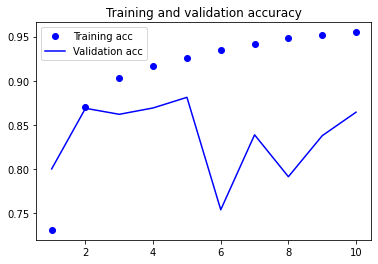

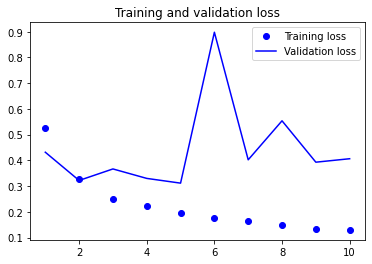

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

 - #### The highest accuracy on validation dataset is 88%
 - #### There seems to be slight improvement in execution time

#### <center>The Values for Loss and Accuracy on Training and Validation Data for highest Accuracy on Validation Data</center>

| Model | CPU Time for 10 Epochs(Google Colab) | Loss on Training Data | Loss on Validation Data | Accuracy on Training Data | Accuracy on Validation Data | 
| --- | --- | --- | --- | --- | --- |
| SimpleRNN Model | 6 Minutes | 0.2971 | 0.3501 | 0.8814 | 0.8610 |
| LSTM Model | 23 Minutes | 0.1928 | 0.3066 | 0.9279 | 0.8940 |
| GRU Model | 18 Minues | 0.1640 | 0.3279 | 0.9410 | 0.8796 |